### 06.2 线性二分类实现

先获取数据，并做可视化

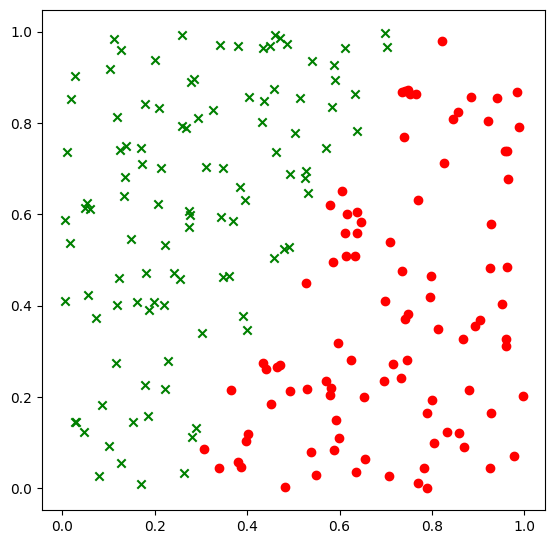

In [75]:
import numpy as np
from HelperClass.NeuralNet_1_2 import *
file_name = "ch06.npz"
reader = DataReader_1_1(file_name)
reader.ReadData()
fig = plt.figure(figsize=(6.5,6.5))
X,Y = reader.GetWholeTrainSamples()
for i in range(200):
    if Y[i,0] == 1:
        plt.scatter(X[i,0], X[i,1], marker='x', c='g')
    else:
        plt.scatter(X[i,0], X[i,1], marker='o', c='r')

可以看到有两类不同的点，中间有线性的分界线。  
开始训练，有两个输入，一个输出，学习率为0.1，最大迭代数为1000，批处理数量为5，误差为0.1，指定网络类型为二元分类

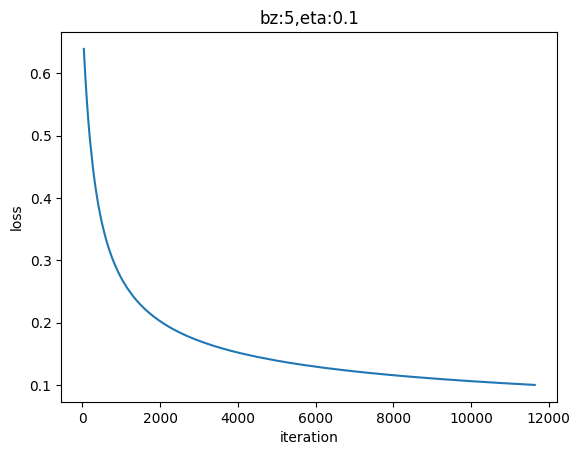

W= [[-15.61103528]
 [  8.00059657]]
B= [[3.83415255]]
A= [[0.89475895]
 [0.1908709 ]
 [0.51649946]]


In [76]:
num_input = 2
num_output = 1
hp = HyperParameters_1_1(num_input, num_output, eta=0.1, max_epoch=1000, batch_size=5, eps=0.1, net_type=NetType.BinaryClassifier)
net = NeuralNet_1_2(hp)
net.train(reader, checkpoint=1)

# inference
x_predicate = np.array([0.58,0.92,0.62,0.55,0.39,0.29]).reshape(3,2)
a = net.inference(x_predicate)
print("A=", a)


损失函数值记录很平稳地下降，说明网络收敛了。可视化分类结果

1.9512339029382082 -0.4792333314806227


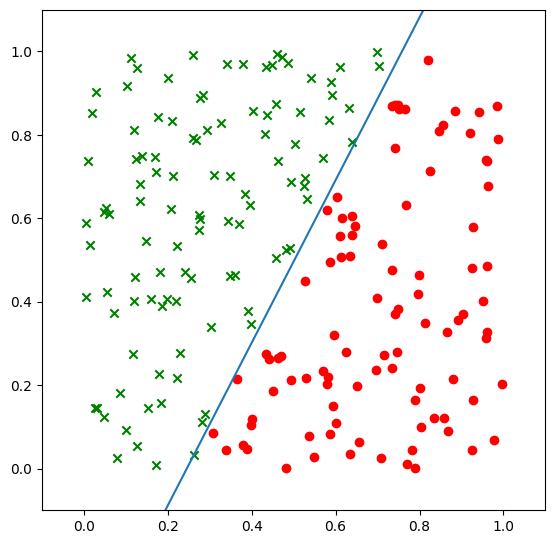

In [77]:
fig = plt.figure(figsize=(6.5,6.5))
X,Y = reader.GetWholeTrainSamples()
for i in range(200):
    if Y[i,0] == 1:
        plt.scatter(X[i,0], X[i,1], marker='x', c='g')
    else:
        plt.scatter(X[i,0], X[i,1], marker='o', c='r')
b12 = -net.B[0,0]/net.W[1,0]
w12 = -net.W[0,0]/net.W[1,0]
print(w12,b12)
x = np.linspace(0,1,10)
y = w12 * x + b12
plt.plot(x,y)
plt.axis([-0.1,1.1,-0.1,1.1])
plt.show()

画出模型的3D图

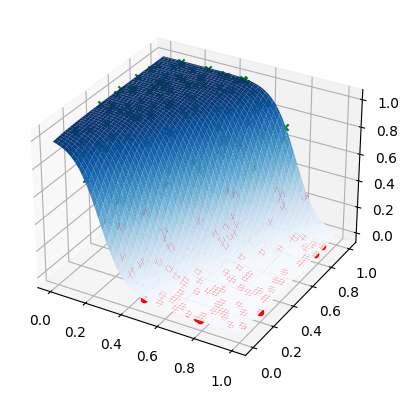

In [80]:
def logister(x1,x2):
     return 1/(1+np.exp(-(net.W[0,0]*x1 + net.W[1,0]*x2 + net.B[0,0])))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
u = np.linspace(0, 1, 100)
v = np.linspace(0, 1, 100)
XM, YM = np.meshgrid(u, v)
R = np.zeros((len(u), len(v)))
for i in range(len(u)):
        for j in range(len(v)):
            R[i, j] = logister(XM[i, j],YM[i, j])
ax.plot_surface(XM, YM, R, cmap='Blues')
for i in range(200):
    if Y[i,0] == 1:
        ax.scatter(X[i,0], X[i,1], logister(X[i,0],X[i,1]),marker='x', c='g')
    else:
        ax.scatter(X[i,0], X[i,1], logister(X[i,0],X[i,1]),marker='o', c='r')